In [121]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os 

In [122]:
# Files to load
city_data_to_load = os.path.join ("Resources", "city_data.csv")
ride_data_to_load = os.path.join ("Resources", "ride_data.csv")

In [123]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)

In [124]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)

In [125]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

In [126]:
# Create the Urban Suburban and Rural city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]


In [127]:
#challenge deliverable using groupby total rides, total drivers, and total fares 
#create sub df for total ride, total driver, total fare 
total_ride_df = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_driver_df = city_data_df.groupby(["type"]).sum()["driver_count"]
total_fare_df = pyber_data_df.groupby(["type"]).sum()["fare"]

In [128]:
#merge distinct df together one at a time. 
challenge_df1 = pd.merge(total_ride_df, total_driver_df, how="left", on=["type"])
challenge_df2 = pd.merge(challenge_df1, total_fare_df, how="left", on=["type"])

In [129]:
#format df for the challenge 
#format the headers
challenge_df3 = challenge_df2.rename(columns=
                                     {"ride_id":"Total Rides",
                                      "driver_count":"Total Drivers",
                                      "fare": "Total Fares"})

In [130]:
# Remove the index name.
challenge_df3.index.name = None

In [131]:
# Get average fare for each city type.
urban_avg_fare = urban_cities_df.mean()["fare"]
suburban_avg_fare = suburban_cities_df.mean()["fare"]
rural_avg_fare = rural_cities_df.mean()["fare"]

In [132]:
#calculate average fare per ride and adding it to existing dataframe 
# Declare list containing avg fare
avgfares = [rural_avg_fare,suburban_avg_fare,urban_avg_fare] 
#put list into the dataframe
challenge_df3['Average Fare per Ride'] = avgfares 

In [133]:
#calculate avg fare per driver
avfpd =challenge_df3["Total Fares"] / challenge_df3["Total Drivers"]
challenge_df3['Average Fare per Driver'] = avfpd

In [134]:
#format adding $ and fixing decimal to total fares
challenge_df3["Total Fares"] = challenge_df3["Total Fares"].map("${:,.2f}".format)

In [135]:
#format the avg fare per ride 
challenge_df3["Average Fare per Ride"] = challenge_df3["Average Fare per Ride"].map("${:,.2f}".format)

In [136]:
#challenge deliverable #1 #################################################################
###########################################################################################
###########################################################################################
#format the avg fare per driver 
challenge_df3["Average Fare per Driver"] = challenge_df3["Average Fare per Driver"].map("${:,.2f}".format)
challenge_df3

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [137]:
#challenge deliverable #2 starts #################################################################
#############################################################################################
#############################################################################################

#rename the column as suggested by the challenge 
pyber_renamed = pyber_data_df.rename(columns=
                                     {'city':'City', 
                                      'date':'Date',
                                      'fare':'Fare', 
                                      'ride_id': 'Ride Id',
                                      'driver_count': 'No. Drivers', 
                                      'type':'City Type'})
pyber_renamed

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [138]:
#set the index to the date column
pyber_index = pyber_renamed.set_index(["Date"])

In [139]:
#using the copy method to achieve new dataframe 
pyber_indexN = pyber_index[['City Type', 'Fare']].copy()
pyber_indexN.head()

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58


In [140]:
#Set index to datetime datatype and show it
pyber_indexN.index = pd.to_datetime(pyber_indexN.index)
pyber_indexN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [141]:
#Calculate the sum() of fares by the type of city and date using groupby() 
#to create a Series.  Convert the groupby Series into a DataFrame.
sumfares = pyber_indexN.groupby(["City Type"]).sum()
print(type(sumfares))
sumfares

<class 'pandas.core.frame.DataFrame'>


,Fare
City Type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


In [142]:
#Reset the index, 
sumfaresind = sumfares.reset_index(drop=True)
sumfaresind

,Fare
0,4327.93
1,19356.33
2,39854.38


In [143]:
#then create a pivot table DataFrame with the Date as the index and columns = 'City Type'.
#The Fare for each Date should appear in each row. 
pivot = pyber_indexN.pivot_table(index=['Date'],
                                 columns=['City Type'],
                                 values=['Fare'],
                                 aggfunc='sum')
pivot

Fare                
City Type            Rural Suburban  Urban
Date                                      
2019-01-01 00:08:16    NaN      NaN  37.91
2019-01-01 00:46:46    NaN    47.74    NaN
2019-01-01 02:07:24    NaN    24.07    NaN
2019-01-01 03:46:50    NaN      NaN   7.57
2019-01-01 05:23:21    NaN      NaN  10.75
2019-01-01 09:45:36  43.69      NaN    NaN
2019-01-01 12:32:48    NaN    25.56    NaN
2019-01-01 14:40:14    NaN      NaN   5.42
2019-01-01 14:42:25    NaN      NaN  12.31
2019-01-01 14:52:06    NaN    31.15    NaN
2019-01-01 17:22:58    NaN      NaN  42.11
2019-01-01 21:04:01    NaN      NaN  11.71
2019-01-02 00:13:08    NaN    44.71    NaN
2019-01-02 00:44:03    NaN      NaN  43.72
2019-01-02 00:56:53    NaN      NaN  37.34
2019-01-02 01:41:26    NaN    49.95    NaN
2019-01-02 01:46:40    NaN      NaN  34.79
2019-01-02 06:55:36    NaN      NaN  16.96
2019-01-02 07:26:53    NaN    33.57    NaN
2019-01-02 09:28:27    NaN      NaN  19.81
2019-01-02 09:57:04    NaN      NaN  33.06
2019-01-02 11:18:32  52.12      NaN    NaN
2019-01-02 11:51:32    NaN      NaN   7.45
2019-01-02 14:14:50    NaN      NaN  13.89
2019-01-02 15:38:25    NaN    45.32    NaN
2019-01-02 16:22:46    NaN    47.07    NaN
2019-01-02 16:59:55    NaN    33.62    NaN
2019-01-02 17:52:38    NaN    20.68    NaN
2019-01-02 20:08:57    NaN      NaN  10.19
2019-01-02 20:52:31    NaN      NaN  33.08
2019-01-02 21:27:09    NaN      NaN  19.57
2019-01-02 23:23:19    NaN      NaN  36.13
2019-01-03 01:03:50    NaN      NaN  17.97
2019-01-03 01:06:17    NaN      NaN   5.32
2019-01-03 01:16:44    NaN    14.61    NaN
2019-01-03 05:45:12    NaN      NaN  25.47
2019-01-03 05:56:07    NaN      NaN  37.40
2019-01-03 06:18:54    NaN      NaN  39.16
2019-01-03 06:49:15    NaN      NaN  34.42
2019-01-03 09:58:50    NaN    38.31    NaN
2019-01-03 10:03:19    NaN      NaN  17.16
2019-01-03 13:04:14    NaN    12.60    NaN
2019-01-03 15:37:24    NaN      NaN  17.61
2019-01-03 16:19:25    NaN      NaN  18.93
2019-01-03 17:02:29    NaN    47.97    NaN
2019-01-03 19:51:01  19.90      NaN    NaN
2019-01-03 21:29:48    NaN    19.99    NaN
2019-01-03 21:45:19    NaN      NaN  36.28
2019-01-03 22:50:12    NaN      NaN   5.81
2019-01-03 23:11:22    NaN      NaN   4.95
2019-01-04 02:56:24    NaN      NaN  32.75
2019-01-04 03:16:36    NaN      NaN   9.10
2019-01-04 03:31:26  24.88      NaN    NaN
2019-01-04 04:30:04    NaN      NaN  15.47
2019-01-04 06:10:40    NaN      NaN  35.35
2019-01-04 09:32:47    NaN      NaN  12.25
2019-01-04 10:24:04    NaN    20.69    NaN
2019-01-04 13:30:18    NaN      NaN   4.56
2019-01-04 15:56:18    NaN      NaN  31.99
2019-01-04 16:38:59    NaN      NaN  37.20
2019-01-04 20:45:01    NaN      NaN  20.33
2019-01-04 21:06:42    NaN      NaN  34.77
2019-01-04 23:57:27    NaN      NaN  24.37
2019-01-05 00:44:39    NaN      NaN  21.59
2019-01-05 05:02:35    NaN      NaN  34.11
2019-01-05 05:57:54    NaN      NaN  39.90
2019-01-05 08:35:06    NaN      NaN  21.57
2019-01-05 09:33:59    NaN      NaN  39.47
2019-01-05 10:59:55    NaN      NaN  16.22
2019-01-05 11:31:02    NaN      NaN  13.14
2019-01-05 13:42:28    NaN    31.48    NaN
2019-01-05 14:35:09    NaN      NaN   5.92
2019-01-05 14:49:26    NaN    47.38    NaN
2019-01-05 15:36:46    NaN      NaN  37.91
2019-01-05 16:36:19    NaN      NaN  39.44
2019-01-05 16:39:33    NaN      NaN  26.72
2019-01-05 17:16:21    NaN      NaN  44.68
2019-01-05 17:44:41    NaN      NaN  28.79
2019-01-05 17:50:07    NaN      NaN  41.55
2019-01-05 17:58:39    NaN    22.50    NaN
2019-01-05 18:22:02    NaN      NaN  35.35
2019-01-05 19:32:37    NaN      NaN  27.02
2019-01-05 22:21:59    NaN      NaN  33.51
2019-01-06 02:08:30    NaN    39.83    NaN
2019-01-06 02:20:49    NaN      NaN  27.20
2019-01-06 07:38:40  47.33      NaN    NaN
2019-01-06 08:34:21    NaN      NaN  43.05
2019-01-06 11:43:01    NaN    22.80    NaN
2019-01-06 12:30:31    NaN      NaN  27.71
2019-01-06 13:23:28    NaN      NaN  11.01
2019-01-06 20:14:54    

In [144]:
#Create a new DataFrame from the pivot table DataFrame on the given dates, 
#'2019-01-01':'2019-04-28', using loc.
newdf = pivot.loc['2019-01-01':'2019-04-28']
newdf

Fare                
City Type            Rural Suburban  Urban
Date                                      
2019-01-01 00:08:16    NaN      NaN  37.91
2019-01-01 00:46:46    NaN    47.74    NaN
2019-01-01 02:07:24    NaN    24.07    NaN
2019-01-01 03:46:50    NaN      NaN   7.57
2019-01-01 05:23:21    NaN      NaN  10.75
2019-01-01 09:45:36  43.69      NaN    NaN
2019-01-01 12:32:48    NaN    25.56    NaN
2019-01-01 14:40:14    NaN      NaN   5.42
2019-01-01 14:42:25    NaN      NaN  12.31
2019-01-01 14:52:06    NaN    31.15    NaN
2019-01-01 17:22:58    NaN      NaN  42.11
2019-01-01 21:04:01    NaN      NaN  11.71
2019-01-02 00:13:08    NaN    44.71    NaN
2019-01-02 00:44:03    NaN      NaN  43.72
2019-01-02 00:56:53    NaN      NaN  37.34
2019-01-02 01:41:26    NaN    49.95    NaN
2019-01-02 01:46:40    NaN      NaN  34.79
2019-01-02 06:55:36    NaN      NaN  16.96
2019-01-02 07:26:53    NaN    33.57    NaN
2019-01-02 09:28:27    NaN      NaN  19.81
2019-01-02 09:57:04    NaN      NaN  33.06
2019-01-02 11:18:32  52.12      NaN    NaN
2019-01-02 11:51:32    NaN      NaN   7.45
2019-01-02 14:14:50    NaN      NaN  13.89
2019-01-02 15:38:25    NaN    45.32    NaN
2019-01-02 16:22:46    NaN    47.07    NaN
2019-01-02 16:59:55    NaN    33.62    NaN
2019-01-02 17:52:38    NaN    20.68    NaN
2019-01-02 20:08:57    NaN      NaN  10.19
2019-01-02 20:52:31    NaN      NaN  33.08
2019-01-02 21:27:09    NaN      NaN  19.57
2019-01-02 23:23:19    NaN      NaN  36.13
2019-01-03 01:03:50    NaN      NaN  17.97
2019-01-03 01:06:17    NaN      NaN   5.32
2019-01-03 01:16:44    NaN    14.61    NaN
2019-01-03 05:45:12    NaN      NaN  25.47
2019-01-03 05:56:07    NaN      NaN  37.40
2019-01-03 06:18:54    NaN      NaN  39.16
2019-01-03 06:49:15    NaN      NaN  34.42
2019-01-03 09:58:50    NaN    38.31    NaN
2019-01-03 10:03:19    NaN      NaN  17.16
2019-01-03 13:04:14    NaN    12.60    NaN
2019-01-03 15:37:24    NaN      NaN  17.61
2019-01-03 16:19:25    NaN      NaN  18.93
2019-01-03 17:02:29    NaN    47.97    NaN
2019-01-03 19:51:01  19.90      NaN    NaN
2019-01-03 21:29:48    NaN    19.99    NaN
2019-01-03 21:45:19    NaN      NaN  36.28
2019-01-03 22:50:12    NaN      NaN   5.81
2019-01-03 23:11:22    NaN      NaN   4.95
2019-01-04 02:56:24    NaN      NaN  32.75
2019-01-04 03:16:36    NaN      NaN   9.10
2019-01-04 03:31:26  24.88      NaN    NaN
2019-01-04 04:30:04    NaN      NaN  15.47
2019-01-04 06:10:40    NaN      NaN  35.35
2019-01-04 09:32:47    NaN      NaN  12.25
2019-01-04 10:24:04    NaN    20.69    NaN
2019-01-04 13:30:18    NaN      NaN   4.56
2019-01-04 15:56:18    NaN      NaN  31.99
2019-01-04 16:38:59    NaN      NaN  37.20
2019-01-04 20:45:01    NaN      NaN  20.33
2019-01-04 21:06:42    NaN      NaN  34.77
2019-01-04 23:57:27    NaN      NaN  24.37
2019-01-05 00:44:39    NaN      NaN  21.59
2019-01-05 05:02:35    NaN      NaN  34.11
2019-01-05 05:57:54    NaN      NaN  39.90
2019-01-05 08:35:06    NaN      NaN  21.57
2019-01-05 09:33:59    NaN      NaN  39.47
2019-01-05 10:59:55    NaN      NaN  16.22
2019-01-05 11:31:02    NaN      NaN  13.14
2019-01-05 13:42:28    NaN    31.48    NaN
2019-01-05 14:35:09    NaN      NaN   5.92
2019-01-05 14:49:26    NaN    47.38    NaN
2019-01-05 15:36:46    NaN      NaN  37.91
2019-01-05 16:36:19    NaN      NaN  39.44
2019-01-05 16:39:33    NaN      NaN  26.72
2019-01-05 17:16:21    NaN      NaN  44.68
2019-01-05 17:44:41    NaN      NaN  28.79
2019-01-05 17:50:07    NaN      NaN  41.55
2019-01-05 17:58:39    NaN    22.50    NaN
2019-01-05 18:22:02    NaN      NaN  35.35
2019-01-05 19:32:37    NaN      NaN  27.02
2019-01-05 22:21:59    NaN      NaN  33.51
2019-01-06 02:08:30    NaN    39.83    NaN
2019-01-06 02:20:49    NaN      NaN  27.20
2019-01-06 07:38:40  47.33      NaN    NaN
2019-01-06 08:34:21    NaN      NaN  43.05
2019-01-06 11:43:01    NaN    22.80    NaN
2019-01-06 12:30:31    NaN      NaN  27.71
2019-01-06 13:23:28    NaN      NaN  11.01
2019-01-06 20:14:54    

In [145]:
#Create a new DataFrame by setting the DataFrame you created in Step 8 with resample() 
#in weekly bins, and calculate the sum() of the fares for each week in the resampled data.
resamdf = newdf.resample('W').sum()
resamdf

Fare                  
City Type    Rural Suburban    Urban
Date                                
2019-01-06  187.92   721.60  1661.68
2019-01-13   67.65  1105.13  2050.43
2019-01-20  306.00  1218.20  1939.02
2019-01-27  179.69  1203.28  2129.51
2019-02-03  333.08  1042.79  2086.94
2019-02-10  115.80   974.34  2162.64
2019-02-17   95.82  1045.50  2235.07
2019-02-24  419.06  1412.74  2466.29
2019-03-03  175.14   858.46  2218.20
2019-03-10  303.94   925.27  2470.93
2019-03-17  163.39   906.20  2044.42
2019-03-24  189.76  1122.20  2368.37
2019-03-31  199.42  1045.06  1942.77
2019-04-07  501.24  1010.73  2356.70
2019-04-14  269.79   784.82  2390.72
2019-04-21  214.14  1149.27  2303.80
2019-04-28  191.85  1357.75  2238.29

<function matplotlib.pyplot.show(*args, **kw)>

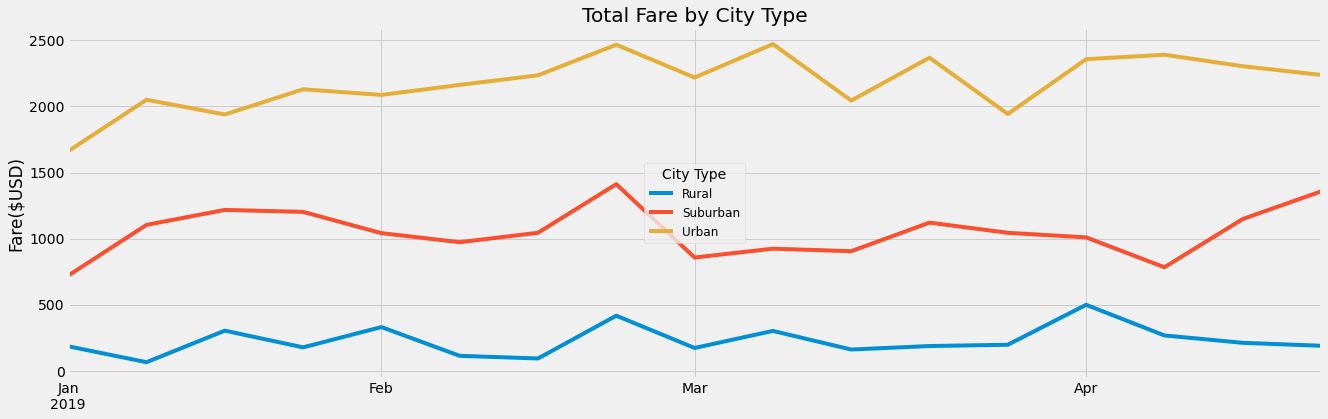

In [146]:
#Using the object-oriented interface method, 
#plot the DataFrame you created in Step 9 using the df.plot() function. 
#Things to consider with your plotting:
#    Import the style from Matplotlib.
#    Use the FiveThirtyEight (Links to an external site.) graph style.
#    Add a title.
#    Add x- and y-axis labels according to the final figure.
#    Save the figure to the “analysis” folder.
#    Make the figure size large enough so it’s not too small.
import matplotlib.style as style
style.use('fivethirtyeight')
fte_graph = resamdf.plot(figsize = (20,6))
fte_graph.set(xlabel='', ylabel='Fare($USD)', title='Total Fare by City Type',)
# Create a legend
lgnd = plt.legend(["Rural", "Suburban", "Urban"], fontsize="12", mode="Expanded",
         scatterpoints=1, loc="center", title="City Type")

#fte_graph.legend(["AAA", "BBB"])
plt.savefig("analysis/totalfarebycity.png")
plt.show